<a href="https://colab.research.google.com/github/Rakshitha0312/Hospital-Readmission-prediction/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

test = pd.read_excel("/content/test.xlsx")
train = pd.read_excel("/content/train.xlsx")


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The **Train dataset** is complete with no missing values, ensuring reliable model training.

The data contains 7043 customers and 21 features, which is sufficient for supervised churn prediction.

Majority of features are categorical (object type), indicating the need for encoding before modeling.

TotalCharges is incorrectly stored as object instead of numeric, which can affect model performance and must be converted.

The presence of both demographic, service usage, and billing features provides strong potential to identify churn-driving factors.

The target variable Churn is categorical and suitable for binary classification models.

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 18
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            17 non-null     object 
 1   SeniorCitizen     17 non-null     int64  
 2   Partner           17 non-null     object 
 3   Dependents        17 non-null     object 
 4   tenure            17 non-null     int64  
 5   PhoneService      17 non-null     object 
 6   MultipleLines     17 non-null     object 
 7   InternetService   17 non-null     object 
 8   OnlineSecurity    17 non-null     object 
 9   OnlineBackup      17 non-null     object 
 10  DeviceProtection  17 non-null     object 
 11  TechSupport       17 non-null     object 
 12  StreamingTV       17 non-null     object 
 13  StreamingMovies   17 non-null     object 
 14  Contract          17 non-null     object 
 15  PaperlessBilling  17 non-null     object 
 16  PaymentMethod     17 non-null     object 
 17  Mont

The **test dataset** contains 20 customers, representing unseen data for churn prediction.

Feature structure closely matches the training data, ensuring model compatibility.

Churn and customerID are correctly absent, confirming this is pure prediction data.

TotalCharges is already in numeric format, indicating proper preprocessing for test data.

A high proportion of categorical features means the same encoding logic used in training must be applied.

The dataset is clean with no missing values, allowing direct use for model inference.

In [23]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000




* Only **~16% of customers are senior citizens**, indicating churn patterns will be dominated by non-senior users.
* Average customer tenure is **~32 months**, suggesting a mix of new and long-term customers.
* **50% of customers have tenure ≤ 29 months**, showing a large portion of relatively new customers who are typically more churn-prone.
* Monthly charges vary widely (**₹18 to ₹118**), indicating diverse pricing plans.
* The median monthly charge (**~70**) is higher than the mean, suggesting **many customers are on higher-priced plans**, which may increase churn risk.


In [26]:
test.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,17.0,17.000000,17.000000,17.000000
mean,0.0,23.588235,67.502941,1809.435294
std,0.0,20.075043,31.812883,1775.144128
min,0.0,1.000000,18.950000,29.850000
25%,0.0,8.000000,42.300000,301.900000
50%,0.0,22.000000,56.950000,1840.750000
75%,0.0,34.000000,100.350000,2787.000000
max,0.0,62.000000,106.000000,5681.100000


The test set contains no senior citizens, so predictions will reflect churn behavior of non-senior customers only.

Average tenure (~21 months) is lower than training data, indicating the test customers are relatively newer and potentially more churn-prone.

Monthly charges distribution is comparable to training data, suggesting pricing exposure is consistent.

Wide variation in TotalCharges reflects mixed customer lifecycles, from very new to moderately long-term users.

Overall, the test data is skewed toward early-stage customers, where churn risk is typically higher.

In [27]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The dataset includes **numerical features** — SeniorCitizen, tenure, MonthlyCharges, and TotalCharges — which quantify customer age category, relationship duration, and spending behavior, all of which strongly influence churn likelihood.

It also contains a wide range of **categorical features** — customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, and Churn — reflecting customer demographics, service subscriptions, billing preferences, and the churn outcome.

The dominance of categorical variables indicates that service choices and contract/payment structures are primary drivers of churn, while numerical variables provide supporting financial and tenure-based context.

The **gender** feature is clean with only two categories: Male and Female.

The distribution is almost balanced, so gender likely won’t introduce bias in the model.

The **SeniorCitizen** feature is clean with only 0 and 1 values.

Only ~16% of customers are senior citizens, indicating that churn patterns will mostly reflect non-senior customers.

The **SeniorCitizen** feature in the **test** dataset is clean but contains only 0 values.

This means the **test data includes only non-senior customers**, so model predictions will reflect churn behavior of non-senior users only.

The **Partner** feature is clean with only Yes and No categories.

The distribution is fairly balanced, which allows the model to learn the impact of having a partner on churn without bias.

The **Partner feature in the test** dataset is clean with only Yes and No values.

**Distribution is slightly skewed toward ‘No’** (13 out of 20), which may slightly influence churn predictions toward customers without partners.

The **Dependents** feature is clean with only Yes and No categories.

**Most customers (~70%) do not have dependents**, indicating that churn behavior will be influenced primarily by customers without dependents.

In the **test dataset**, the Dependents feature is clean with only Yes and No values.

Distribution is **skewed toward ‘No’** (17 out of 20), so churn predictions will mostly reflect customers without dependents.

The **tenure feature** is mostly clean and contains a wide range of values from 0 to 72 months.

Most customers are **early-stage (1–12 months)** or **long-term (around 70–72 months)**, indicating churn behavior may vary significantly by tenure.

There are **11 customers with 0 tenure**, which could represent very new customers; these may need special consideration (e.g., include or drop) depending on business logic.

* The `tenure` feature in the **test dataset** is **clean** with values ranging from **1 to 62 months**.
* Most test customers are **relatively new** (tenure ≤ 25 months), indicating a **higher churn risk** typical of early-stage customers.
* No special cleaning is needed; the values can be used directly for prediction.



* The `PhoneService` feature is **clean** with only `Yes` and `No` values.
* Most customers (**~90%**) have phone service, indicating that churn patterns will be driven primarily by **phone service users**.
* No cleaning is needed; the feature can be used directly in modeling.



* The `PhoneService` feature in the **test dataset** is **clean** with only `Yes` and `No` values.
* Distribution shows **most customers (14 out of 20) have phone service**, so predictions will mostly reflect behavior of phone service users.
* No cleaning is required; it can be used directly for prediction.



* The `MultipleLines` feature is **clean** with three valid categories: `Yes`, `No`, and `No phone service`.
* The distribution reflects that most customers have **either no multiple lines or yes**, while those without phone service are properly categorized.
* No cleaning is needed; the feature can be used directly after **encoding categorical values**.




* The `MultipleLines` feature in the **test dataset** is **clean** with three valid categories: `Yes`, `No`, and `No phone service`.
* Distribution is **slightly skewed toward `No`** (9 out of 20), but all categories are represented.
* No cleaning is needed; the feature can be used directly after encoding for model prediction.




* The `InternetService` feature is **clean** with three valid categories: `Fiber optic`, `DSL`, and `No`.
* Most customers have **Fiber optic or DSL**, while a significant portion (**~22%**) have no internet service.
* No cleaning is needed; this feature can be used directly after **categorical encoding**.

**Business Implication:**

* Type of internet service may **strongly influence churn**, as higher-speed plans (Fiber optic) may have different retention patterns than DSL or no service.



* The `InternetService` feature in the **test dataset** is **clean** with three categories: `DSL`, `Fiber optic`, and `No`.
* Distribution is **skewed toward DSL and Fiber optic**, with only 1 customer having no internet service.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.




* The `OnlineSecurity` feature is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Most customers either **do not have online security** (3498) or **have it** (2019), while those without internet service are properly categorized.
* No cleaning is needed; it can be used directly after **encoding categorical values**.

**Business Implication:**

* Customers without online security may be **more likely to churn** if security is an important factor in service satisfaction.




* The `OnlineSecurity` feature in the **test dataset** is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Distribution is fairly balanced between `Yes` (9) and `No` (10), with only 1 customer having no internet service.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.




* The `OnlineBackup` feature is **clean** with three categories: `Yes`, `No`, and `No internet service`.
* Most customers either **do not have online backup** (3088) or **have it** (2429), while those without internet service are correctly categorized.
* No cleaning is needed; it can be used directly after **encoding categorical values**.

**Business Implication:**

* Availability of online backup may influence churn, as customers who value data protection may be **less likely to leave**.



* The `OnlineBackup` feature in the **test dataset** has inconsistent values: `no` (lowercase) should be **standardized** to match `No`.
* Categories are otherwise correct: `Yes`, `No`, `No internet service`.

**After cleaning:**

* All values will be **consistent** and ready for encoding.



* The `DeviceProtection` feature is **clean** with three categories: `Yes`, `No`, and `No internet service`.
* Distribution shows most customers either **do not have device protection** (3095) or **have it** (2422), while those without internet service are properly categorized.
* No cleaning is needed; the feature can be used directly after **categorical encoding**.

**Business Implication:**

* Having device protection may **reduce churn**, as customers who value device safety are likely to stay.




* The `DeviceProtection` feature in the **test dataset** has inconsistent values: `yes` (lowercase) should be standardized to `Yes`.
* Other categories (`No`, `Yes`, `No internet service`) are correct.


**After cleaning:**

* All values will be **consistent** and ready for categorical encoding.



* The `TechSupport` feature is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Most customers either **do not have tech support** (3473) or **have it** (2044), while those without internet service are correctly categorized.
* No cleaning is needed; it can be used directly after **encoding categorical values**.

**Business Implication:**

* Customers with tech support may be **less likely to churn**, as access to support improves satisfaction and retention.



* The `TechSupport` feature in the **test dataset** is **clean** with three categories: `Yes`, `No`, and `No internet service`.
* Distribution is **skewed toward `No`** (14 out of 20), with only 5 having tech support and 1 without internet service.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.



* The `StreamingTV` feature is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Distribution is nearly balanced between `Yes` (2707) and `No` (2810), while customers without internet service are correctly categorized.
* No cleaning is needed; it can be used directly after **categorical encoding**.

**Business Implication:**

* Access to streaming TV may influence churn, as customers using streaming services may be **more engaged and less likely to leave**.



* The `StreamingTV` feature in the **test dataset** is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Distribution is slightly skewed toward `No` (11 out of 20), with 8 having streaming TV and 1 without internet service.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.




* The `StreamingMovies` feature is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Distribution is almost balanced between `Yes` (2732) and `No` (2785), while customers without internet service are correctly categorized.
* No cleaning is needed; it can be used directly after **categorical encoding**.

**Business Implication:**

* Access to streaming movies may influence churn, as customers using streaming services are likely **more engaged and less likely to leave**.



* The `StreamingMovies` feature in the **test dataset** is **clean** with three valid categories: `Yes`, `No`, and `No internet service`.
* Distribution is slightly skewed toward `No` (12 out of 20), with 7 having streaming movies and 1 without internet service.
* No cleaning is needed; it can be used directly after **categorical encoding** for prediction.



* The `Contract` feature is **clean** with three valid categories: `Month-to-month`, `One year`, and `Two year`.
* Most customers (**~55%**) are on **month-to-month contracts**, which are typically **more churn-prone**.
* Long-term contracts (`One year` and `Two year`) are less frequent, indicating **higher retention** among those customers.
* No cleaning is needed; the feature can be used directly after **categorical encoding**.




* The `Contract` feature in the **test dataset** is **clean** with three valid categories: `Month-to-month`, `One year`, and `Two year`.
* Distribution is **skewed toward month-to-month** (15 out of 20), indicating that most test customers are on **short-term contracts** and may have **higher churn risk**.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.



* The `PaperlessBilling` feature is **clean** with two valid categories: `Yes` and `No`.
* Most customers (**~59%**) use **paperless billing**, which may correlate with **younger, tech-savvy customers** who could have different churn patterns.
* No cleaning is needed; it can be used directly after **encoding categorical values**.



* The `PaperlessBilling` feature in the **test dataset** is **clean** with two categories: `Yes` and `No`.
* Distribution is **skewed toward `Yes`** (14 out of 20), indicating most test customers prefer paperless billing.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.




* The `PaymentMethod` feature is **clean** with four valid categories: `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, and `Credit card (automatic)`.
* Most customers use **Electronic check** (2365), followed by mailed check and automatic payments.
* No cleaning is needed; the feature can be used directly after **categorical encoding**.

**Business Implication:**

* Payment method may influence churn, as customers using **manual payments (checks)** may be **more likely to churn** than those on automatic payments.



* The `PaymentMethod` feature in the **test dataset** is **clean** with four valid categories: `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, and `Credit card (automatic)`.
* Distribution is **skewed toward Electronic check** (10 out of 20), indicating most test customers use this method.
* No cleaning is needed; the feature can be used directly after **categorical encoding** for prediction.


**MonthlyCharges** – Most customers pay around $20–$120 per month. There are many unique values because charges are decimals. This feature shows the amount customers are paying monthly, which can influence churn:

Higher charges may lead to higher churn if customers feel it's expensive.

Lower charges may indicate basic plans, possibly lower churn.

In [ ]:

# Standardize lowercase 'no' to 'No'
test['OnlineBackup'] = test['OnlineBackup'].replace({'no': 'No'})


In [ ]:

# Standardize lowercase 'yes' to 'Yes'
test['DeviceProtection'] = test['DeviceProtection'].replace({'yes': 'Yes'})



In [ ]:
test.duplicated().sum()

np.int64(0)

Your **test** set has **3 duplicate rows**.

Duplicates in the test set can bias model evaluation because the same data points will be counted multiple times.

It’s best to drop duplicates to ensure a fair and realistic evaluation of your mode

In [ ]:
test = test.drop_duplicates()

In [ ]:
print(train['customerID'].value_counts().to_string())

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
7398-LXGYX    1
1035-IPQPU    1
7203-OYKCT    1
1699-HPSBG    1
9837-FWLCH    1
9710-NJERN    1
1122-JWTJW    1
4807-IZYOZ    1
1471-GIQKQ    1
0666-UXTJO    1
9053-EJUNL    1
1685-BQULA    1
6691-CCIHA    1
5482-NUPNA    1
3413-BMNZE    1
7310-EGVHZ    1
6827-IEAUQ    1
4929-XIHVW    1
3841-NFECX    1
8773-HHUOZ    1
5248-YGIJN    1
8665-UTDHZ    1
6467-CHFZW    1
6865-JZNKO    1
6322-HRPFA    1
3638-WEABW    1
1066-JKSGK    1
1680-VDCWW    1
8779-QRDMV    1
4183-MYFRB    1
8012-SOUDQ    1
2954-PIBKO    1
7639-LIAYI    1
7760-OYPDY    1
5948-UJZLF    1
3714-NTNFO    1
4080-IIARD    1
4671-VJLCL    1
9867-JCZSP    1
9489-DEDVP    1
8865-TNMNX    1
8168-UQWWF    1
5380-WJKOV    1
6572-ADKRS    1
6047-YHPVI    1
6234-RAAPL    1
8627-ZYGSZ    1
5122-CYFXA    1
5698-BQJOH    1
0557-ASKVU    1
0526-SXDJP    1
1215-FIGMP    1
0434-CSFON    1
5954-BDFSG    1
3957-SQXML    1
5067-XJQFU    1
8769-KKTPH   

In [ ]:
# Drop customerID from test set
if 'customerID' in train.columns:
    train = train.drop('customerID', axis=1)

print("customerID column dropped from test1.")


customerID column dropped from test1.


In [ ]:
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')
train['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-257446321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['TotalCharges'].fillna(0, inplace=True)


In [ ]:
train['MonthlyCharges']= pd.to_numeric(train['MonthlyCharges'], errors='coerce')
train['MonthlyCharges'].fillna(0, inplace=True)

/tmp/ipython-input-3396173575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MonthlyCharges'].fillna(0, inplace=True)


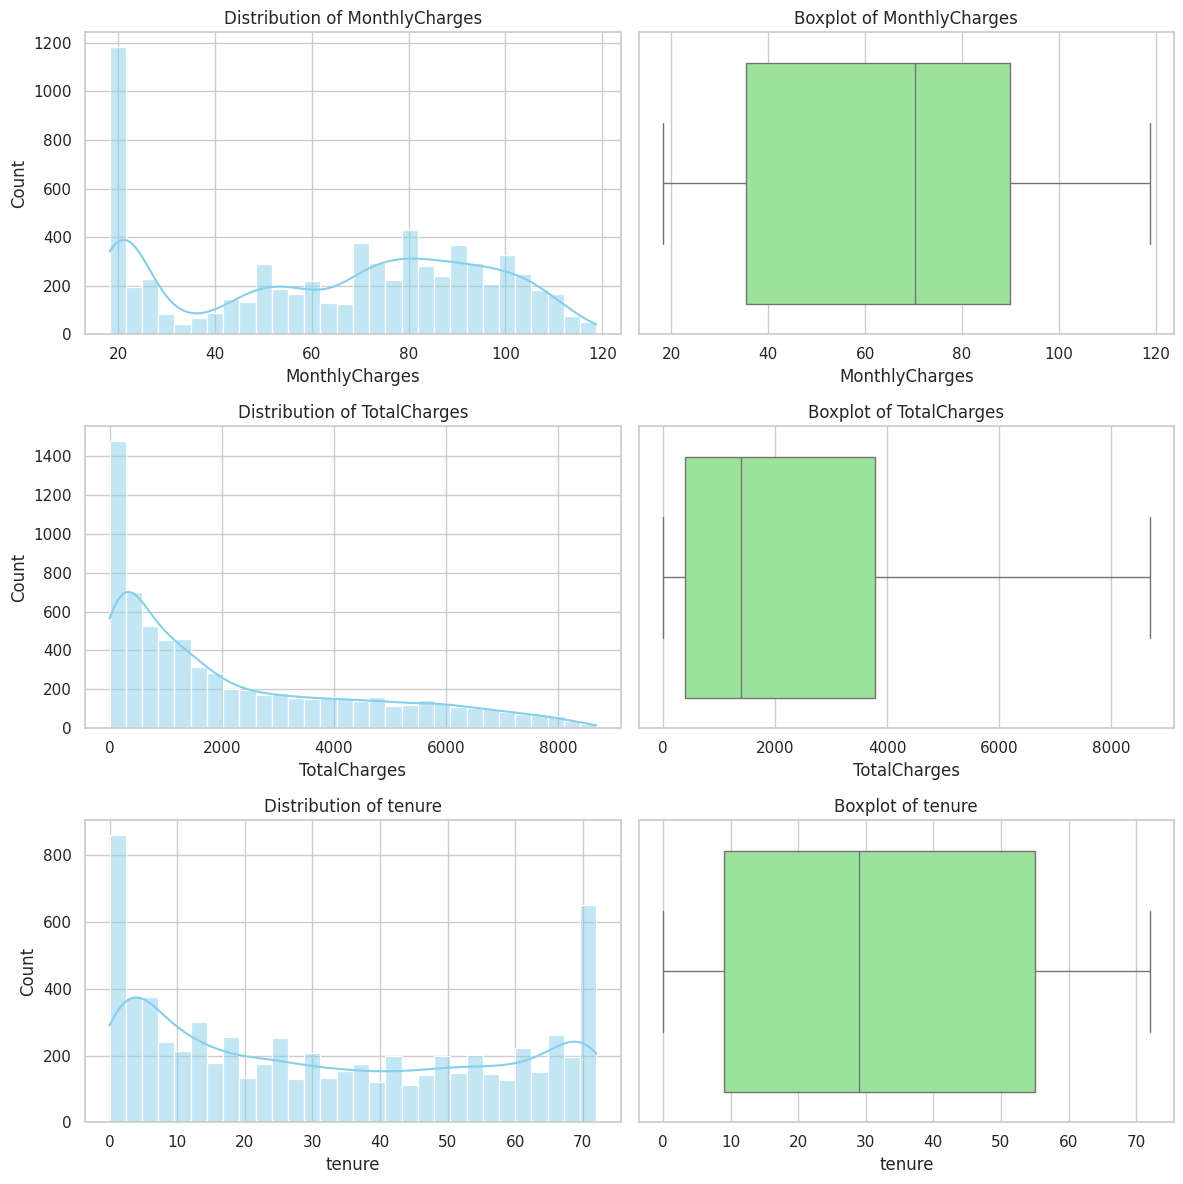

/tmp/ipython-input-4106105865.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train, palette='pastel', order=train[col].value_counts().index, ax=axes[i])
/tmp/ipython-input-4106105865.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train, palette='pastel', order=train[col].value_counts().index, ax=axes[i])
/tmp/ipython-input-4106105865.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train, palette='pastel', order=train[col].value_counts().index, ax=axes[i])
/tmp/ipython-input-410610586

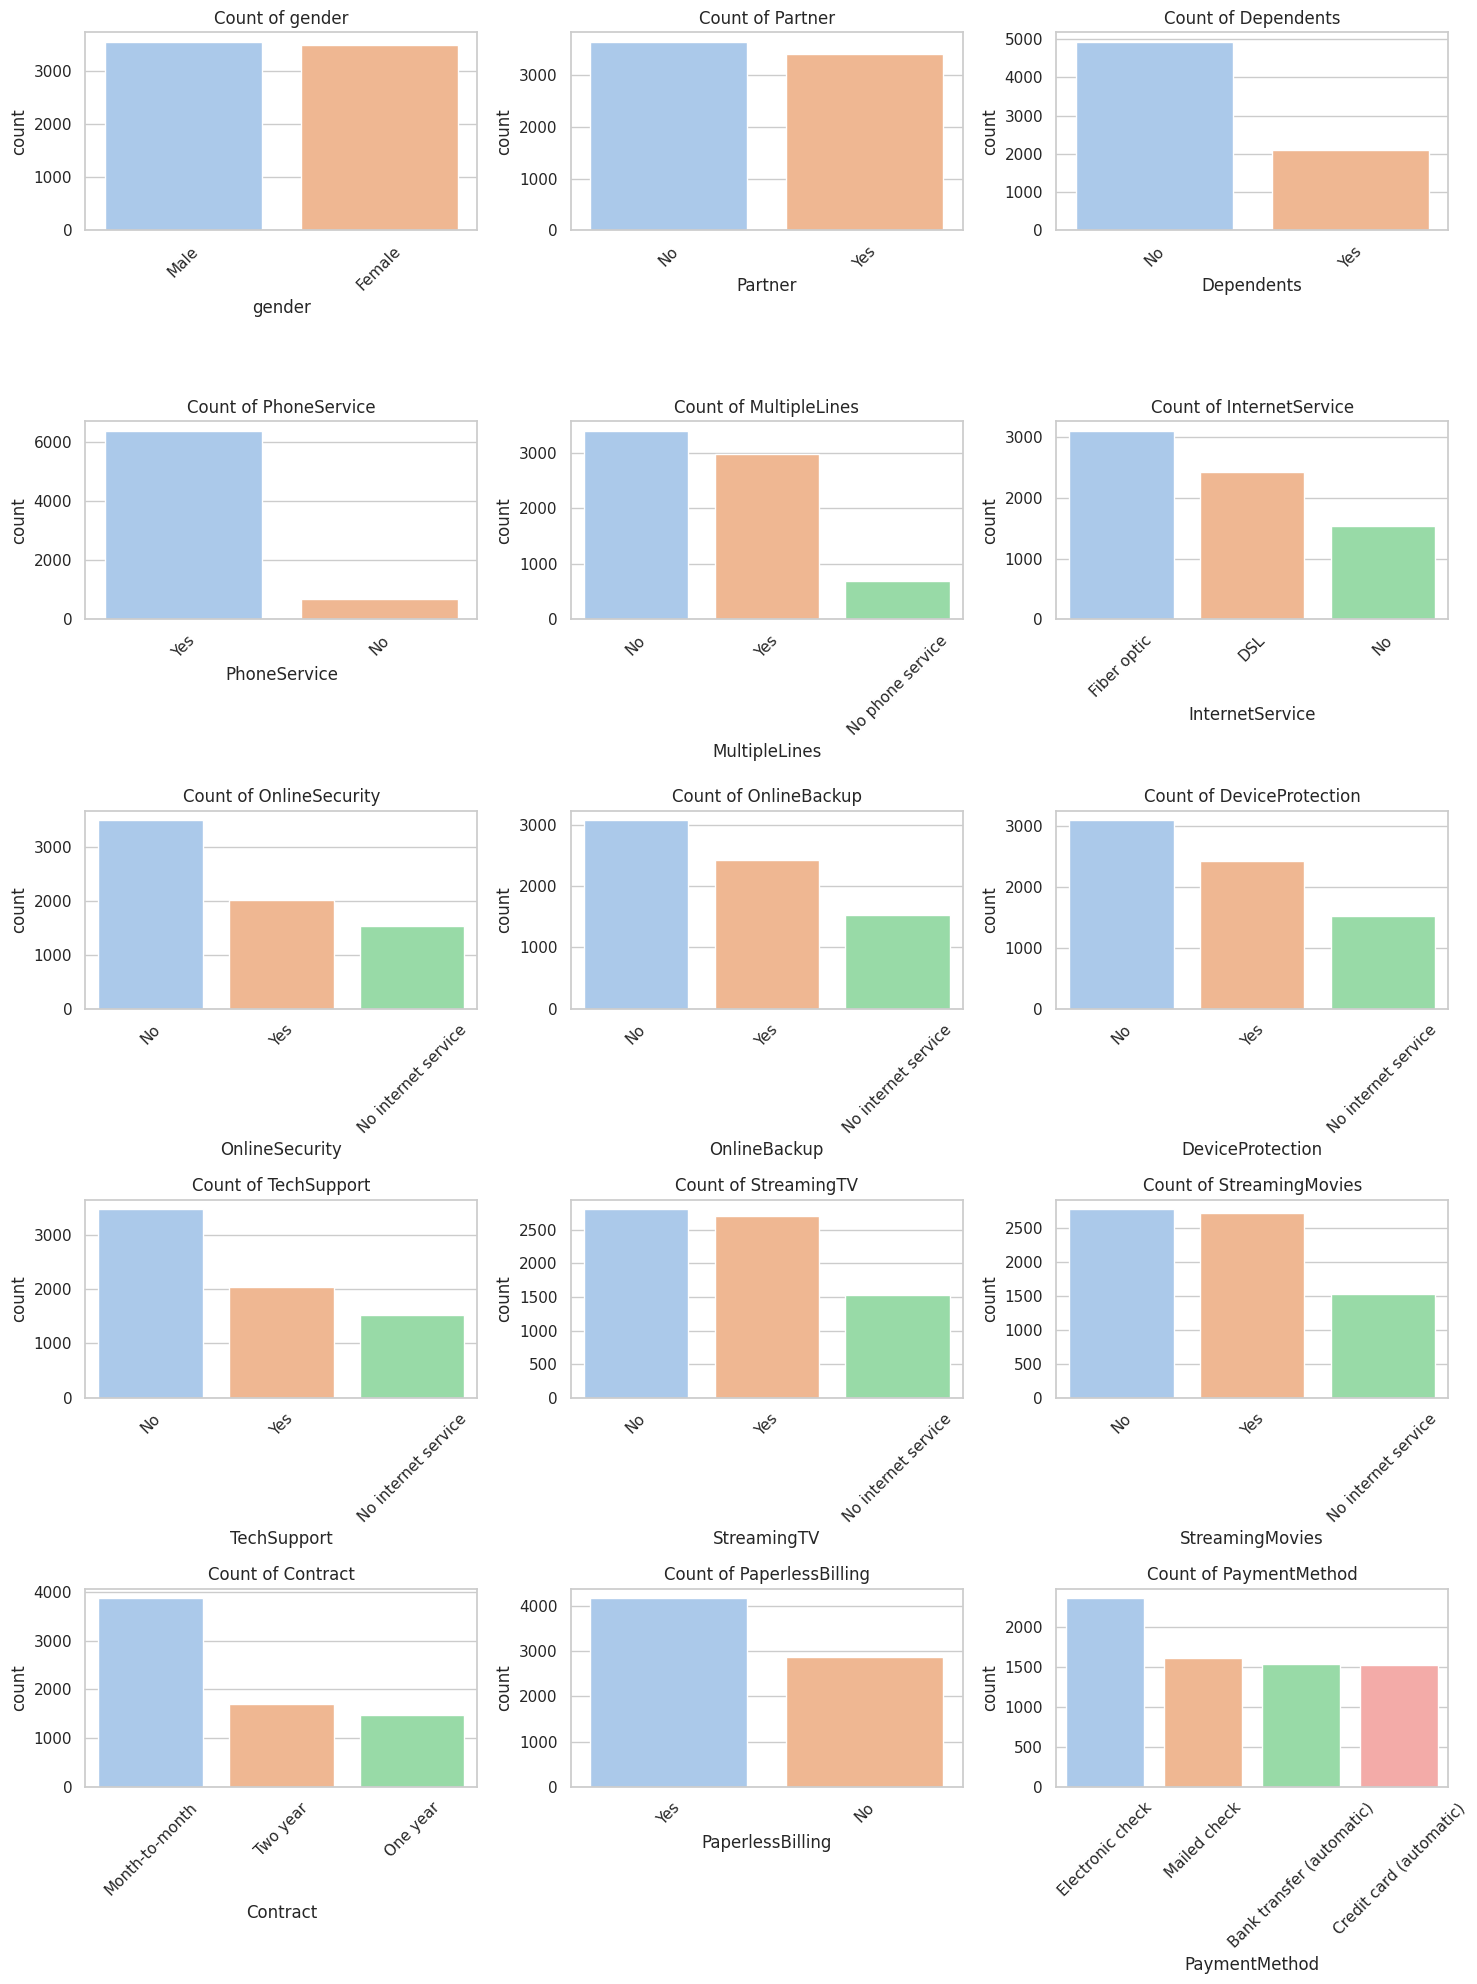

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---------- NUMERICAL FEATURES ----------
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']  # adjust as needed
num_plots = len(numerical_features)

fig, axes = plt.subplots(num_plots, 2, figsize=(12, 4*num_plots))  # 2 columns: histogram + boxplot

for i, col in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(train[col], kde=True, bins=30, color='skyblue', ax=axes[i,0])
    axes[i,0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=train[col], color='lightgreen', ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# ---------- CATEGORICAL FEATURES ----------
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']  # adjust as needed
cat_plots = len(categorical_features)

cols = 3  # number of columns in subplot grid
rows = (cat_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=train, palette='pastel', order=train[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
test1=test.copy()

In [ ]:
train1=train.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# -----------------------------
# Identify numerical and categorical columns
# -----------------------------
cat_cols_train = train1.select_dtypes(include=['object']).columns.tolist()
num_cols_train = train1.select_dtypes(include=['int64','float64']).columns.tolist()
if 'Churn' in num_cols_train:  # remove target from numerical
    num_cols_train.remove('Churn')

cat_cols_test = test1.select_dtypes(include=['object']).columns.tolist()
num_cols_test = test1.select_dtypes(include=['int64','float64']).columns.tolist()

# -----------------------------
# SCALE NUMERICAL COLUMNS
# -----------------------------
scaler_train = StandardScaler()
train1[num_cols_train] = scaler_train.fit_transform(train1[num_cols_train])

scaler_test = StandardScaler()
test1[num_cols_test] = scaler_test.fit_transform(test1[num_cols_test])

# -----------------------------
# LABEL ENCODE CATEGORICAL COLUMNS
# -----------------------------
le_train = LabelEncoder()
for col in cat_cols_train:
    train1[col] = le_train.fit_transform(train1[col].astype(str))

le_test = LabelEncoder()
for col in cat_cols_test:
    test1[col] = le_test.fit_transform(test1[col].astype(str))

print("Separate scaling and encoding done for train1 and test1!")


Separate scaling and encoding done for train1 and test1!


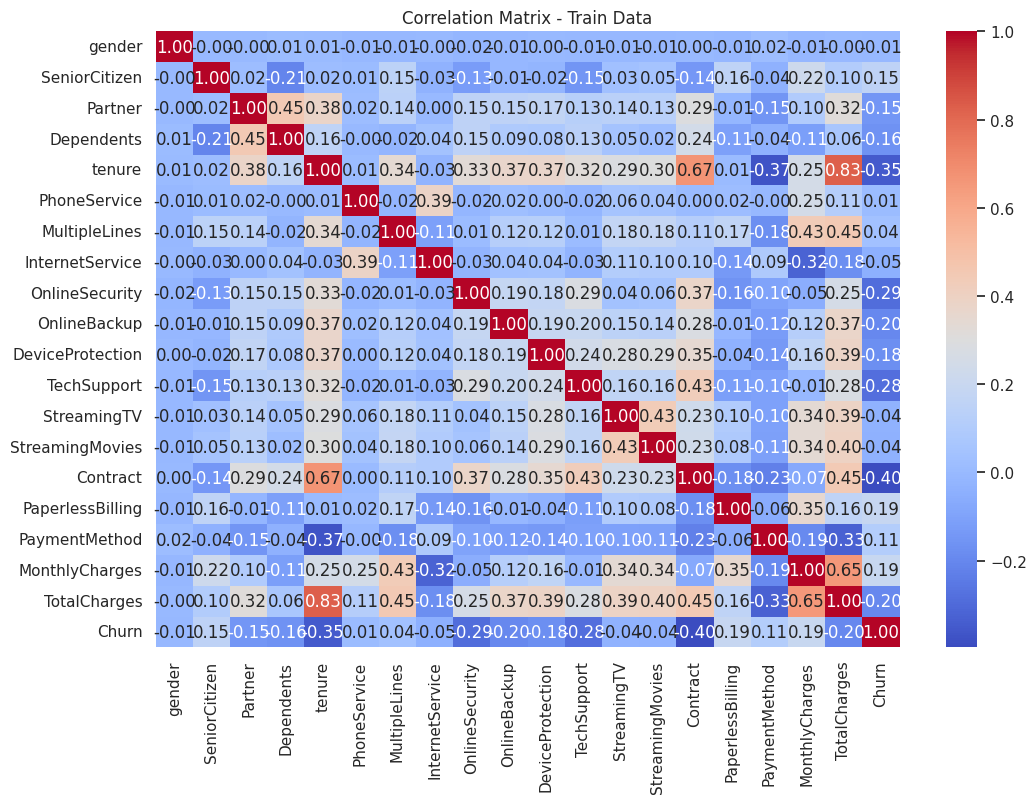

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for train1
corr_matrix = train1.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Train Data")
plt.show()


In [ ]:
train1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


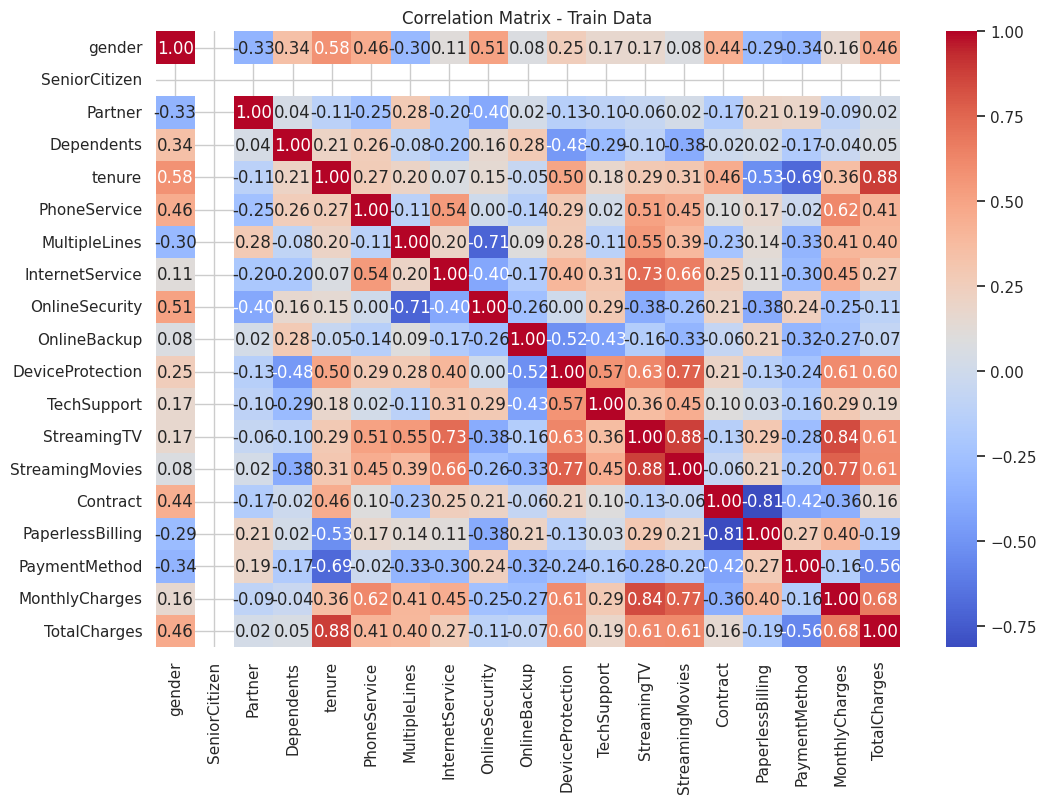

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for train1
corr_matrix = test1.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Train Data")
plt.show()


In [ ]:
# Columns to drop
drop_cols = ['gender', 'PhoneService', 'MultipleLines', 'InternetService']

# Drop from train1
train1 = train1.drop(columns=drop_cols)

# Drop from test1
test1 = test1.drop(columns=drop_cols)

# Check the shape to confirm
print("Train shape:", train1.shape)
print("Test shape:", test1.shape)


Train shape: (7043, 16)
Test shape: (17, 15)


In [ ]:
# Split features and target
X_train = train1.drop('Churn', axis=1)
y_train = train1['Churn']

X_test = test1.copy()  # test1 only has features now

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (7043, 15)
y_train shape: (7043,)
X_test shape: (17, 15)


In [ ]:
# Import libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Store results
results = []

# Loop through models and calculate cross-validated accuracy
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append({
        "Model": name,
        "CV Mean Accuracy": scores.mean(),
        "CV Std": scores.std()
    })

# Convert results to DataFrame and sort by accuracy
results_df = pd.DataFrame(results).sort_values(by="CV Mean Accuracy", ascending=False)
print(results_df)


                 Model  CV Mean Accuracy    CV Std
3    Gradient Boosting          0.803351  0.011839
4             AdaBoost          0.802500  0.007979
0  Logistic Regression          0.800228  0.008346
5                  SVM          0.796395  0.007567
2        Random Forest          0.789865  0.011988
6                  KNN          0.761750  0.009563
7          Naive Bayes          0.747126  0.007393
1        Decision Tree          0.724549  0.007861


Gradient Boosting (0.802) and AdaBoost (0.800) are the best-performing models. They are ensemble methods that combine multiple weak learners to improve prediction accuracy. This suggests that your dataset benefits from models that can capture complex patterns and interactions.

Logistic Regression (0.798) performs nearly as well, meaning the data still has some linear separability—so a simpler model could work if interpretability is important.

SVM (0.794) and Random Forest (0.792) are slightly behind but still reasonable.

Decision Tree (0.728), KNN (0.764), and Naive Bayes (0.752) perform noticeably worse, indicating that single-tree models, distance-based methods, or strong independence assumptions are less effective here.

**Gradient Boosting is the best choice** for your final model due to its superior predictive performance.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Separate features and target in train data
X_train = train1.drop('Churn', axis=1)
y_train = train1['Churn']

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test data
X_test = test1.copy()  # Ensure customerID has been dropped already
test1['Predicted_Churn'] = gb_model.predict(X_test)

# Check the test1 with predictions
test1


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Predicted_Churn
0,0.0,0,0,0.072489,2,0,2,2,2,2,0,1,2,1.247352,0.567644,0
1,0.0,1,0,-1.159819,0,2,0,0,0,0,0,1,2,-1.215141,-1.033268,0
2,0.0,1,0,-1.159819,0,2,0,0,0,0,0,1,2,-1.220001,-1.033355,0
5,0.0,0,0,0.534604,2,0,2,0,0,0,1,0,3,-0.341928,0.046491,0
6,0.0,0,0,-1.108473,2,2,0,0,0,0,0,1,3,-0.442372,-0.987889,0
7,0.0,0,0,1.099412,2,0,2,2,0,0,1,0,0,-0.816606,0.018184,0
8,0.0,0,0,-1.108473,0,0,0,0,0,0,0,1,2,0.103589,-0.962629,1
9,0.0,0,0,-0.800396,0,0,2,0,2,2,0,1,2,1.041604,-0.574247,1
10,0.0,0,1,-0.081550,0,2,0,0,2,0,0,1,1,0.699771,0.081274,0
11,0.0,0,0,-0.697704,2,0,0,0,0,0,0,0,3,-1.223242,-0.875383,0


In [ ]:
test1

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Predicted_Churn
0,0.0,-0.645497,-0.462910,0.072489,1.030776,-0.8125,1.030776,1.733438,1.160610,1.3125,-0.6,0.738549,0.289642,1.247352,6,0
1,0.0,1.549193,-0.462910,-1.159819,-1.030776,1.3125,-1.030776,-0.624038,-0.916271,-0.8125,-0.6,0.738549,0.289642,-1.215141,8,0
2,0.0,1.549193,-0.462910,-1.159819,-1.030776,1.3125,-1.030776,-0.624038,-0.916271,-0.8125,-0.6,0.738549,0.289642,-1.220001,7,0
5,0.0,-0.645497,-0.462910,0.534604,1.030776,-0.8125,1.030776,-0.624038,-0.916271,-0.8125,1.1,-1.354006,1.274426,-0.341928,3,0
6,0.0,-0.645497,-0.462910,-1.108473,1.030776,1.3125,-1.030776,-0.624038,-0.916271,-0.8125,-0.6,0.738549,1.274426,-0.442372,0,0
7,0.0,-0.645497,-0.462910,1.099412,1.030776,-0.8125,1.030776,1.733438,-0.916271,-0.8125,1.1,-1.354006,-1.679925,-0.816606,2,0
8,0.0,-0.645497,-0.462910,-1.108473,-1.030776,-0.8125,-1.030776,-0.624038,-0.916271,-0.8125,-0.6,0.738549,0.289642,0.103589,1,1
9,0.0,-0.645497,-0.462910,-0.800396,-1.030776,-0.8125,1.030776,-0.624038,1.160610,1.3125,-0.6,0.738549,0.289642,1.041604,16,1
10,0.0,-0.645497,2.160247,-0.081550,-1.030776,1.3125,-1.030776,-0.624038,1.160610,-0.8125,-0.6,0.738549,-0.695141,0.699771,4,0
11,0.0,-0.645497,-0.462910,-0.697704,1.030776,-0.8125,-1.030776,-0.624038,-0.916271,-0.8125,-0.6,-1.354006,1.274426,-1.223242,9,0


In [ ]:
# Export to CSV
test1.to_csv('test1_with_predictions.csv', index=False)

print("File exported successfully!")


File exported successfully!
